## Everything in one Set

Change your models in their definition and run the test

In [1]:
from neuron import h, gui
import numpy as np
import copy
from importlib import reload
from helpers import ap, rheobase, generic, stimulation, rmp, phase, ih
from cells.neymotin import iteration1

reload(iteration1)
reload(generic)
config = iteration1.Config()

def HSoma():
    config = iteration1.Config(h_somaModifier=0.02)
    return iteration1.SPI6(config)

def Default():
    config = iteration1.Config()
    return iteration1.SPI6(config)


cellbuilder = HSoma

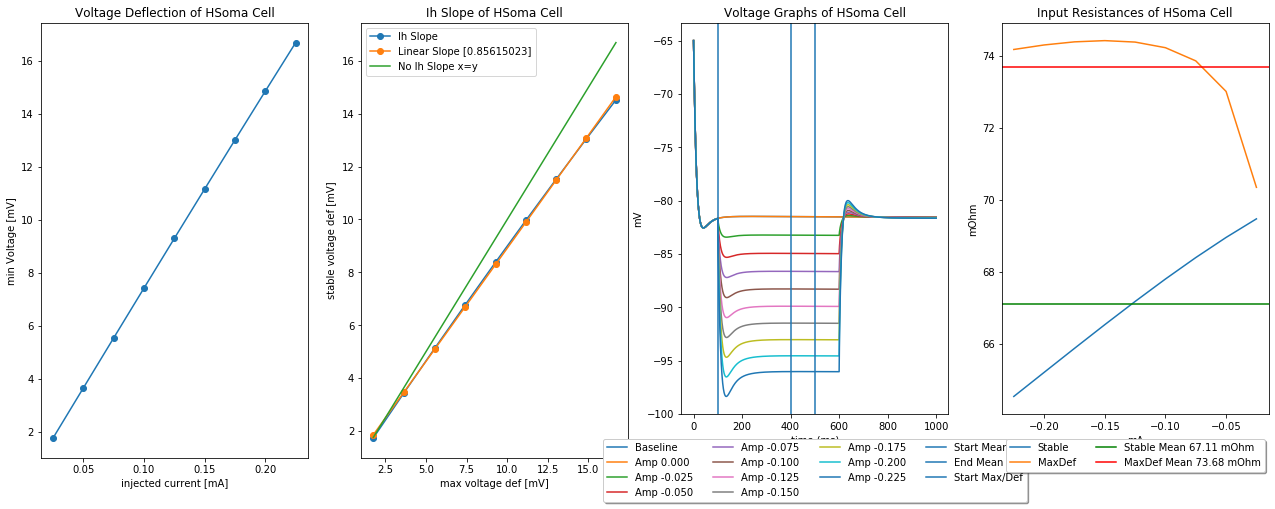

array([[-2.50000000e-02,  6.94746210e+01,  7.03499813e+01],
       [-5.00000000e-02,  6.89588874e+01,  7.30125611e+01],
       [-7.50000000e-02,  6.83995618e+01,  7.38612534e+01],
       [-1.00000000e-01,  6.78044187e+01,  7.42268387e+01],
       [-1.25000000e-01,  6.71810883e+01,  7.43828862e+01],
       [-1.50000000e-01,  6.65368748e+01,  7.44230684e+01],
       [-1.75000000e-01,  6.58786086e+01,  7.43890530e+01],
       [-2.00000000e-01,  6.52125348e+01,  7.43027705e+01],
       [-2.25000000e-01,  6.45442392e+01,  7.41772332e+01]])

In [2]:
ih.calculateInputResistanceAndIhSag(HSoma)

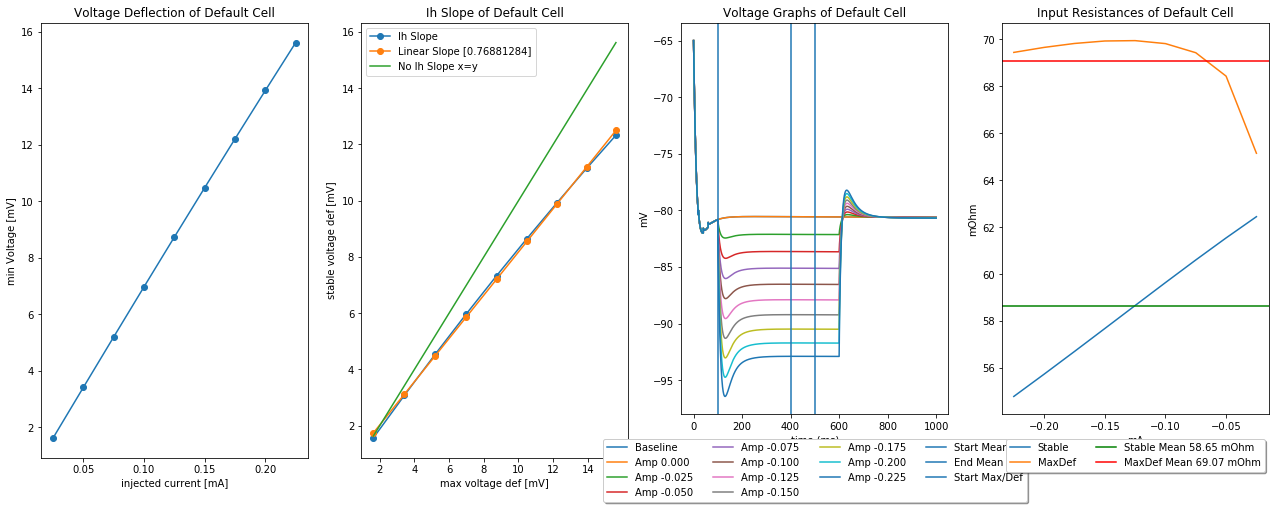

array([[-2.50000000e-02,  6.24460116e+01,  6.51461346e+01],
       [-5.00000000e-02,  6.15421649e+01,  6.84290756e+01],
       [-7.50000000e-02,  6.06032033e+01,  6.94259529e+01],
       [-1.00000000e-01,  5.96404467e+01,  6.98138667e+01],
       [-1.25000000e-01,  5.86643422e+01,  6.99404559e+01],
       [-1.50000000e-01,  5.76842250e+01,  6.99247638e+01],
       [-1.75000000e-01,  5.67081865e+01,  6.98195236e+01],
       [-2.00000000e-01,  5.57430367e+01,  6.96522823e+01],
       [-2.25000000e-01,  5.47943397e+01,  6.94392403e+01]])

In [6]:
ih.calculateInputResistanceAndIhSag(Default)

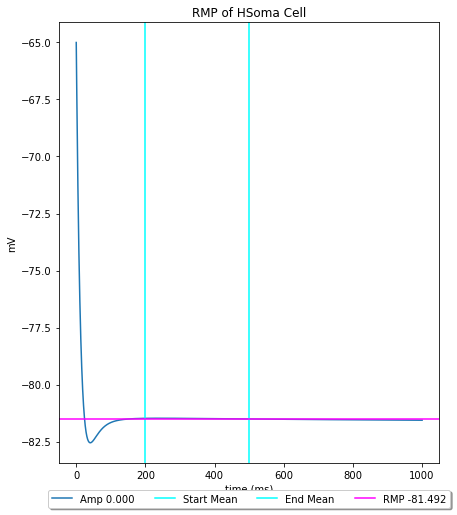

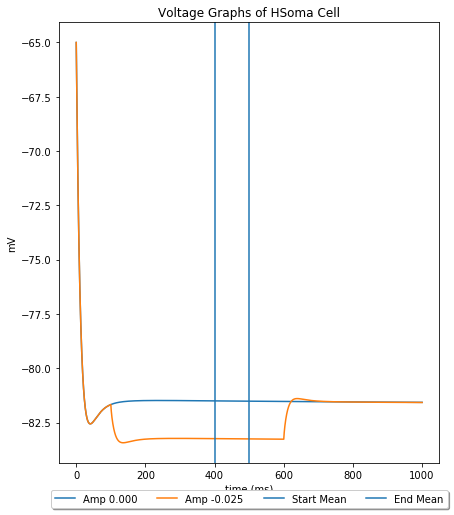

array([[-2.50000000e-02,  6.94746210e+01,  7.68378837e+01]])

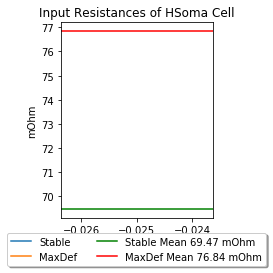

In [3]:
rmp.calculateRMP(HSoma, plot=True)
generic.calculateInputResistance(HSoma, mult=-0.025, iterations=2, plot=True, delay=100, duration=500)

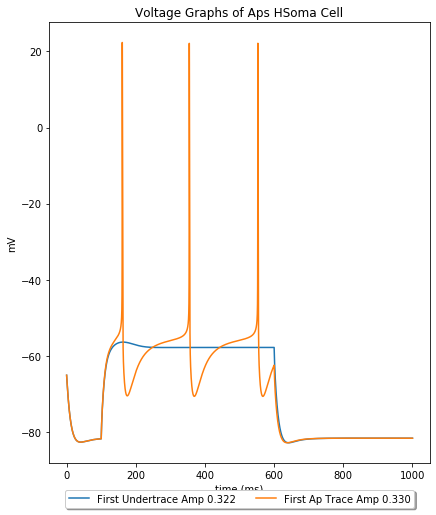

In [4]:
undertrace, overtrace = rheobase.calculateRheobase(HSoma, precisiondigits=2, plot=True, apthreshold = 10) # We have a different apc threshold here

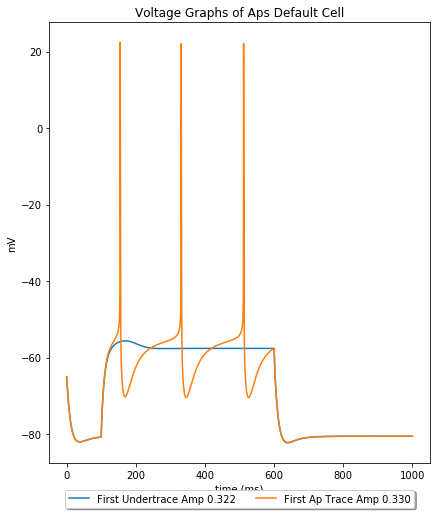

In [5]:
undertrace, overtrace = rheobase.calculateRheobase(Default, precisiondigits=2, plot=True, apthreshold = 10) # We have a different apc threshold here

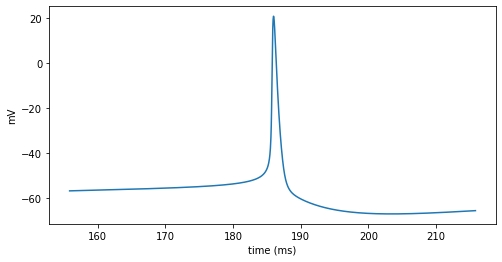

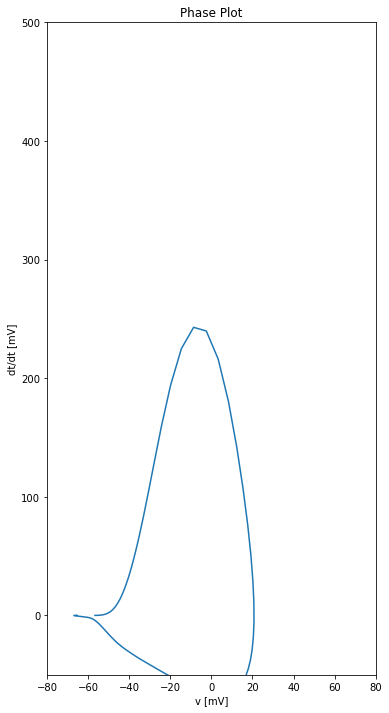

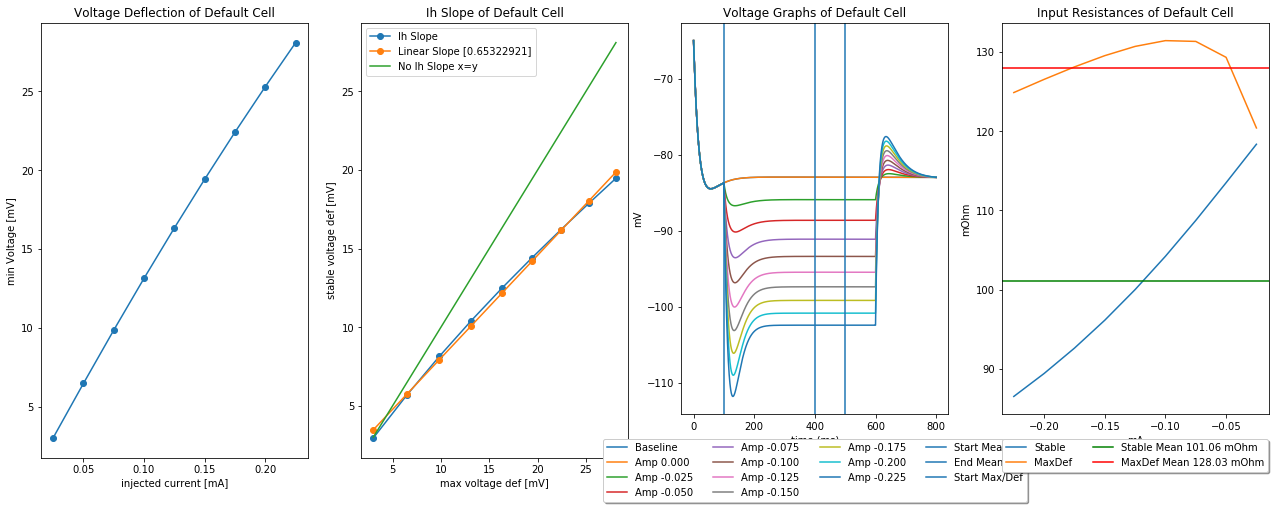

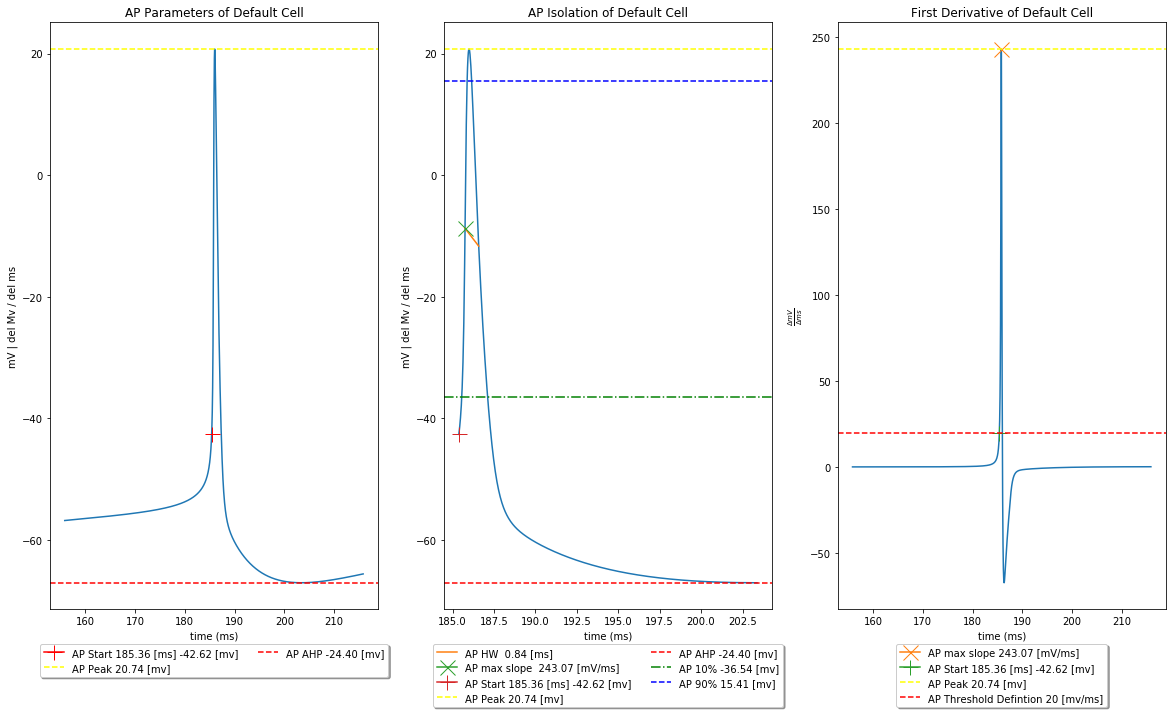

In [8]:
#foundtrace = ap.findFirstApWithinMS(cellbuilder, ms= 15) #is for the approach to get the first ap within ms
aptime = overtrace["aps"][0]
aptrace = generic.isolateTime(overtrace, aptime,30)

generic.plotTrace(aptrace)
phase.phasePlanePlot(aptrace)

ih.calculateInputResistanceAndIhSag(cellbuilder)
aptracewithparams = ap.calculateAPThresholdAndDerivative(aptrace)
ap.plotApParameters(aptracewithparams, deriv=True)

In [31]:
overtrace

{'v': array([-65.        , -65.02910582, -65.06092727, ..., -81.00895328,
        -81.00894065, -81.00892803]),
 't': array([0.00000e+00, 2.50000e-02, 5.00000e-02, ..., 7.99950e+02,
        7.99975e+02, 8.00000e+02]),
 'aps': array([154.15 , 321.675, 490.65 ]),
 'cellbuilder': <function __main__.Default()>,
 'params': {'delay': 100, 'dur': 500, 'amp': 0.34720000000000006}}